In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

In [4]:
# Data display coustomization
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [5]:
# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Data Preparation

### Data Loading

In [6]:
ngo= pd.read_csv("C:\\Users\91976\Downloads\Country-data.csv")
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [7]:
ngo.shape

(167, 10)

# Data Inspection

In [8]:
ngo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [9]:
ngo.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [10]:
ngo.isnull().sum().value_counts(ascending=False)

0    10
dtype: int64

In [11]:
ngo.isnull().sum(axis=1).value_counts(ascending=False)

0    167
dtype: int64

There are no missing / Null values either in columns or rows

# Exploratory Data Analytics

In [12]:
# Converting exports,imports and health spending percentages to absolute values.

ngo['exports'] = ngo['exports'] * ngo['gdpp']/100
ngo['imports'] = ngo['imports'] * ngo['gdpp']/100
ngo['health'] = ngo['health'] * ngo['gdpp']/100

### Univariate Analysis

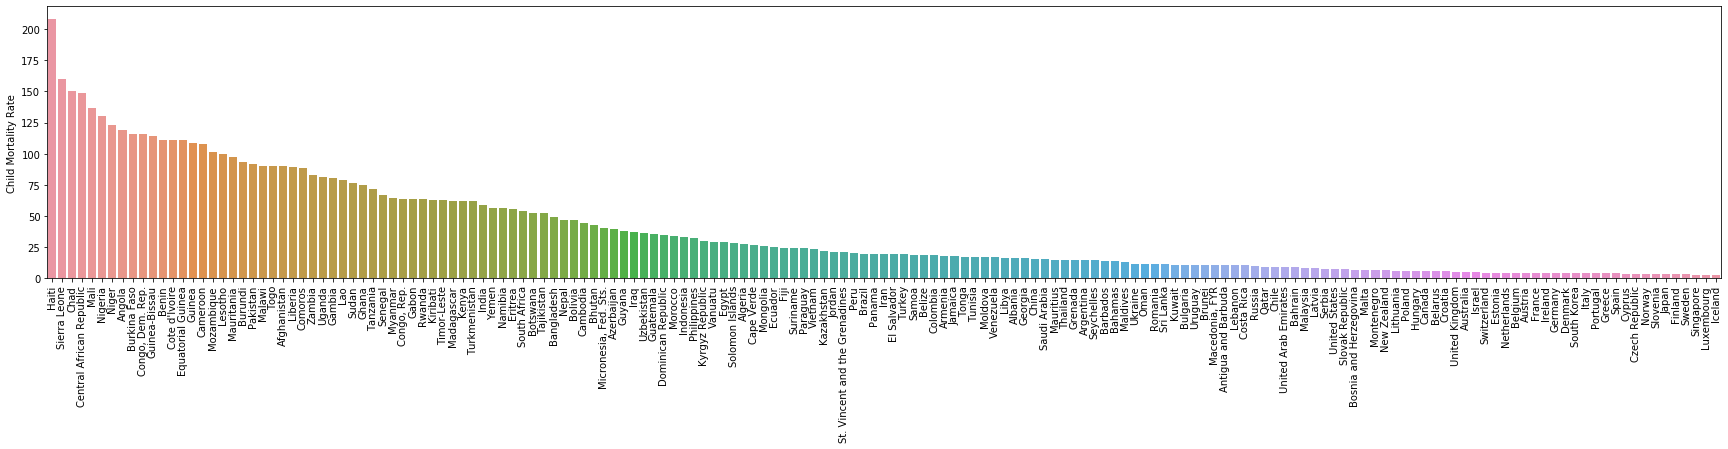

In [13]:
# Child Mortality Rate : Death of children under 5 years of age per 1000 live births
plt.figure(figsize = (30,5))
child_mort = ngo[['country','child_mort']].sort_values('child_mort', ascending = False)
ax = sns.barplot(x='country', y='child_mort', data= child_mort)
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

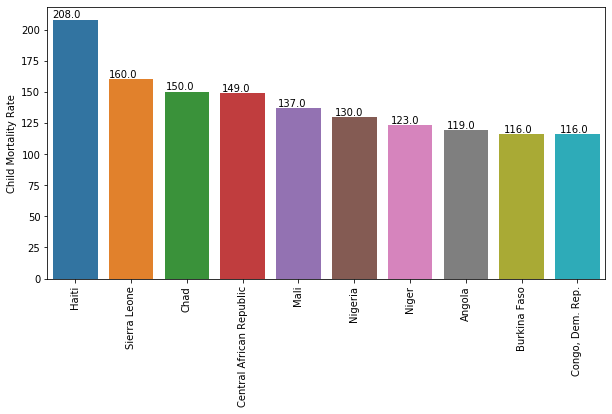

In [14]:
plt.figure(figsize = (10,5))
child_mort_top10 = ngo[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
ax = sns.barplot(x='country', y='child_mort', data= child_mort_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having highest Child Mortality Rate are present in Africa having poor healthcare facilities.

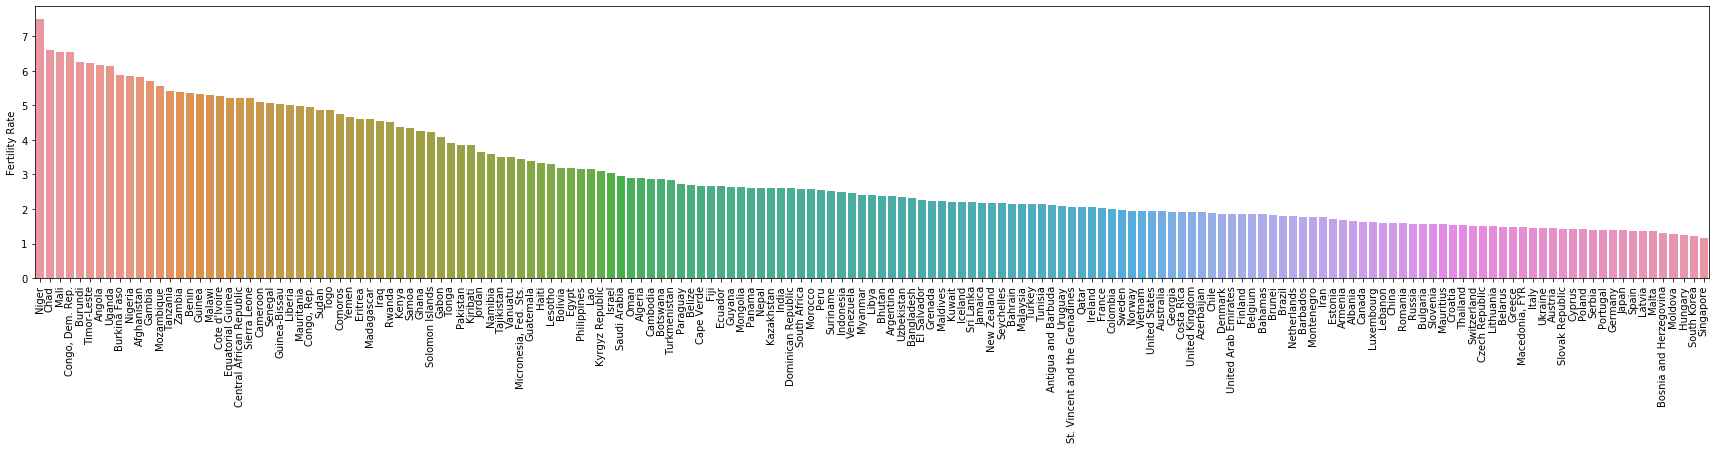

In [15]:
# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
plt.figure(figsize = (30,5))
total_fer = ngo[['country','total_fer']].sort_values('total_fer', ascending = False)
ax = sns.barplot(x='country', y='total_fer', data= total_fer)
ax.set(xlabel = '', ylabel= 'Fertility Rate')
plt.xticks(rotation=90)
plt.show()

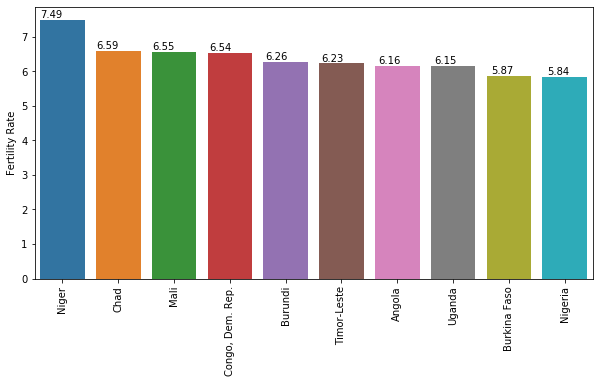

In [16]:
plt.figure(figsize = (10,5))
total_fer_top10 = ngo[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
ax = sns.barplot(x='country', y='total_fer', data= total_fer_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Fertility Rate')
plt.xticks(rotation=90)
plt.show()


Top 10 Countries having highest Fertility Rate are places where people are poorest in all.

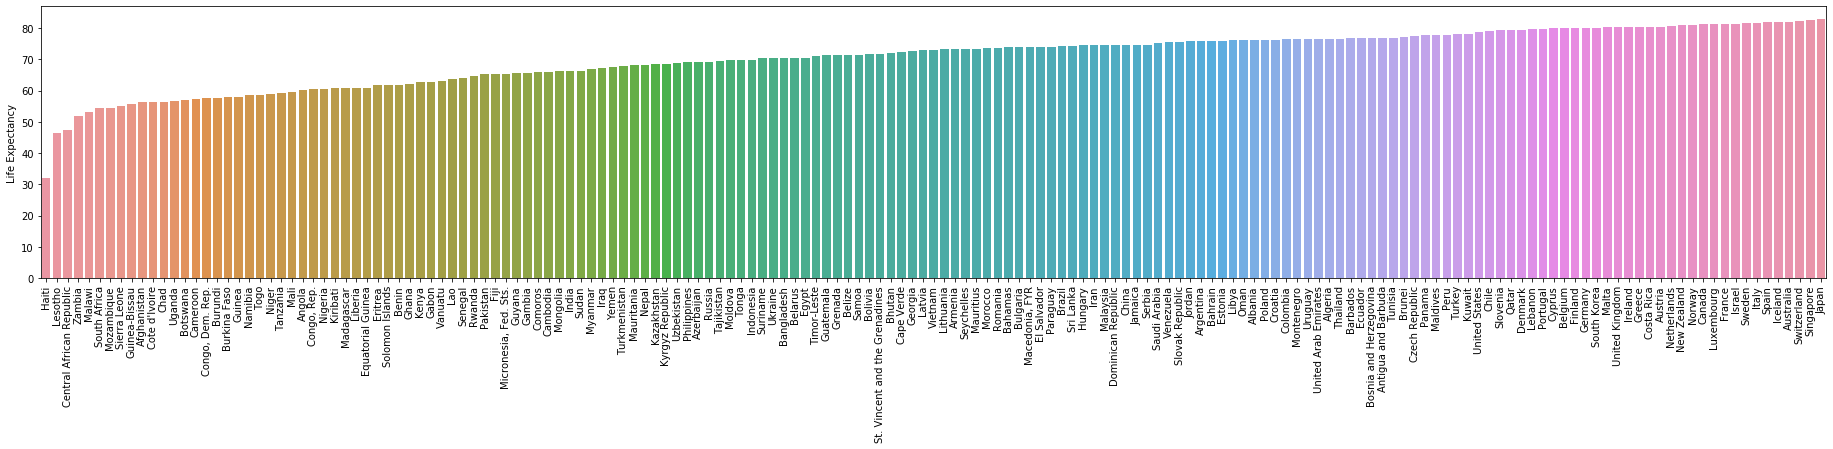

In [17]:
# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same
plt.figure(figsize = (32,5))
life_expec = ngo[['country','life_expec']].sort_values('life_expec', ascending = True)
ax = sns.barplot(x='country', y='life_expec', data= life_expec)
ax.set(xlabel = '', ylabel= 'Life Expectancy')
plt.xticks(rotation=90)
plt.show()

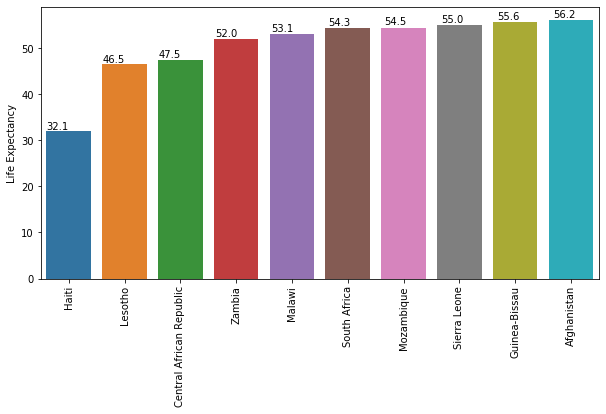

In [18]:
plt.figure(figsize = (10,5))
life_expec_bottom10 = ngo[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
ax = sns.barplot(x='country', y='life_expec', data= life_expec_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Life Expectancy')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest Life Expectancy are places where healthcare system is not available or efficient.

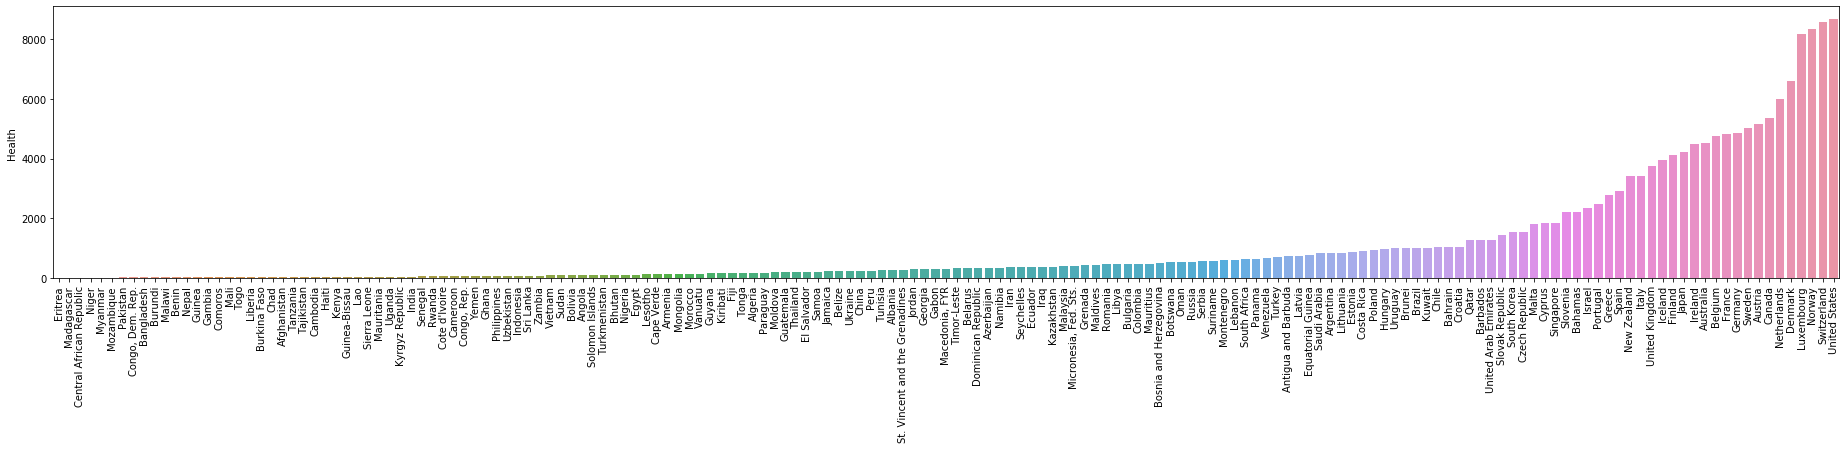

In [19]:
# Health :Total health spending as %age of Total GDP.
plt.figure(figsize = (32,5))
health = ngo[['country','health']].sort_values('health', ascending = True)
ax = sns.barplot(x='country', y='health', data= health)
ax.set(xlabel = '', ylabel= 'Health')
plt.xticks(rotation=90)
plt.show()

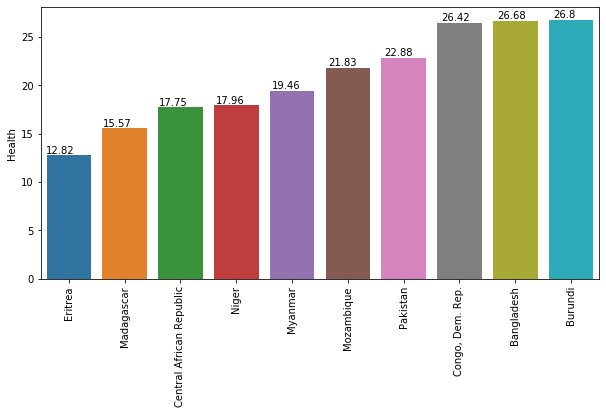

In [20]:
plt.figure(figsize = (10,5))
health_bottom10 = ngo[['country','health']].sort_values('health', ascending = True).head(10)
ax = sns.barplot(x='country', y='health', data= health_bottom10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Health')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest health spending are mix bag of countries where per Capita income is very high or involved in unrest activities.

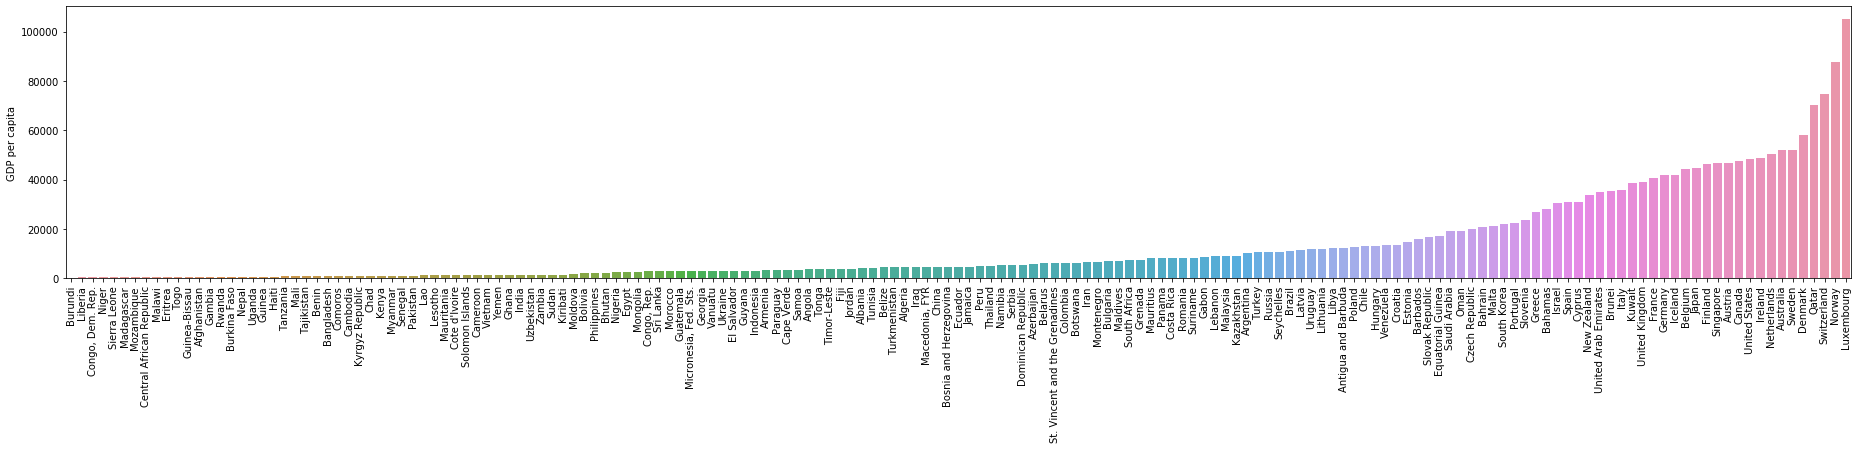

In [21]:
# The GDP per capita : Calculated as the Total GDP divided by the total population.
plt.figure(figsize = (32,5))
gdpp = ngo[['country','gdpp']].sort_values('gdpp', ascending = True)
ax = sns.barplot(x='country', y='gdpp', data= gdpp)
ax.set(xlabel = '', ylabel= 'GDP per capita')
plt.xticks(rotation=90)
plt.show()

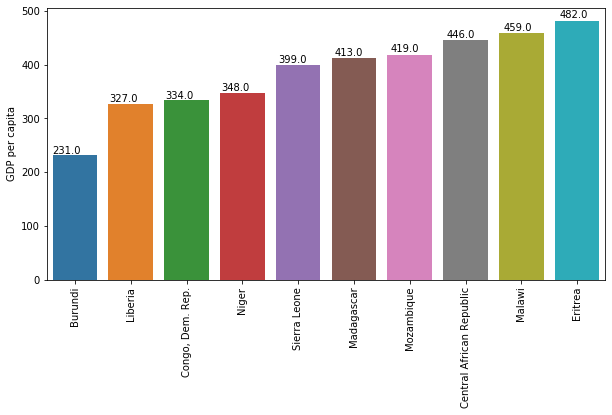

In [22]:
plt.figure(figsize = (10,5))
gdpp_bottom10 = ngo[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
ax = sns.barplot(x='country', y='gdpp', data= gdpp_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'GDP per capita')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest GDP per capita are from East Africa

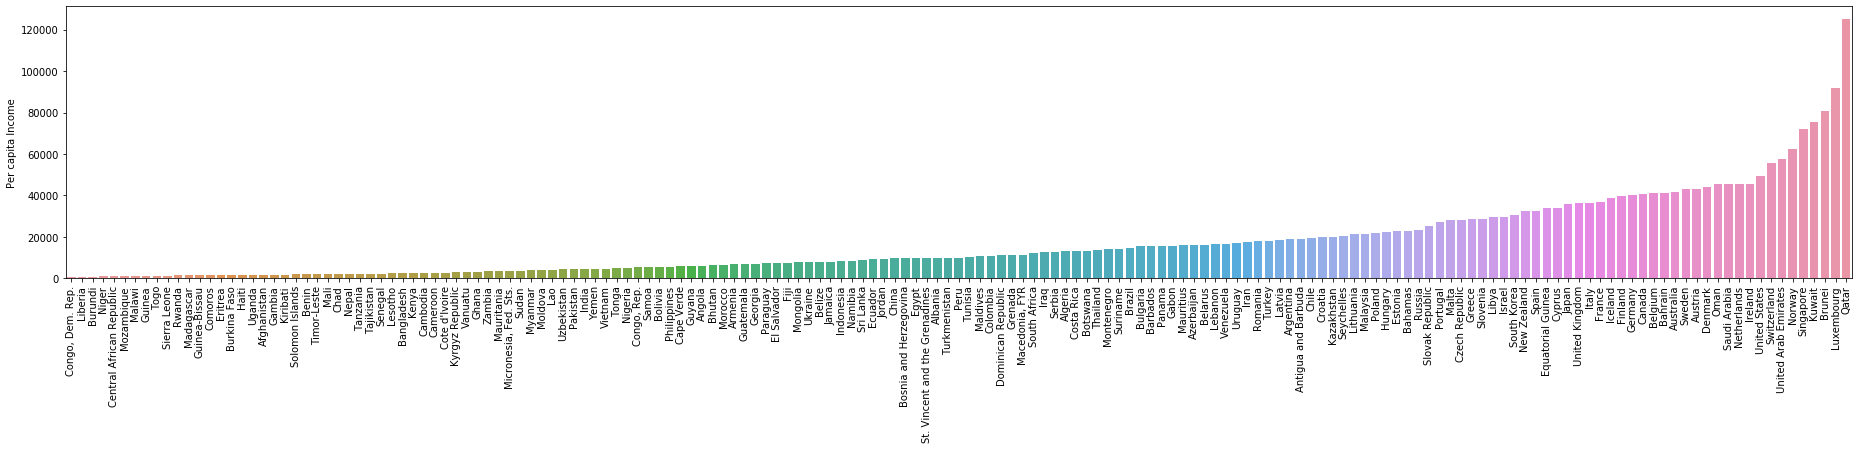

In [23]:
# Per capita Income : Net income per person
plt.figure(figsize = (32,5))
income = ngo[['country','income']].sort_values('income', ascending = True)
ax = sns.barplot(x='country', y='income', data=income)
ax.set(xlabel = '', ylabel= 'Per capita Income')
plt.xticks(rotation=90)
plt.show()

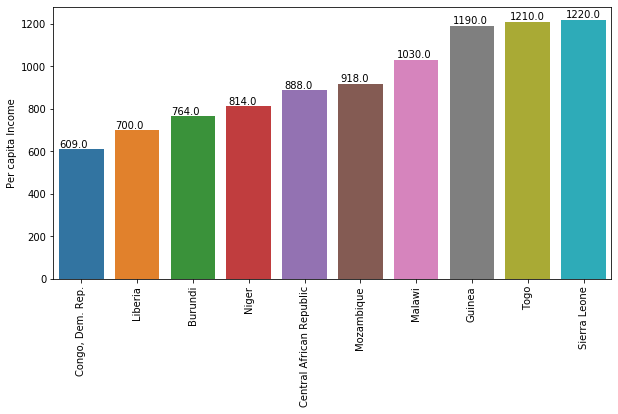

In [24]:
plt.figure(figsize = (10,5))
income_bottom10 = ngo[['country','income']].sort_values('income', ascending = True).head(10)
ax = sns.barplot(x='country', y='income', data= income_bottom10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Per capita Income')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest Per capita Income are from East Africa

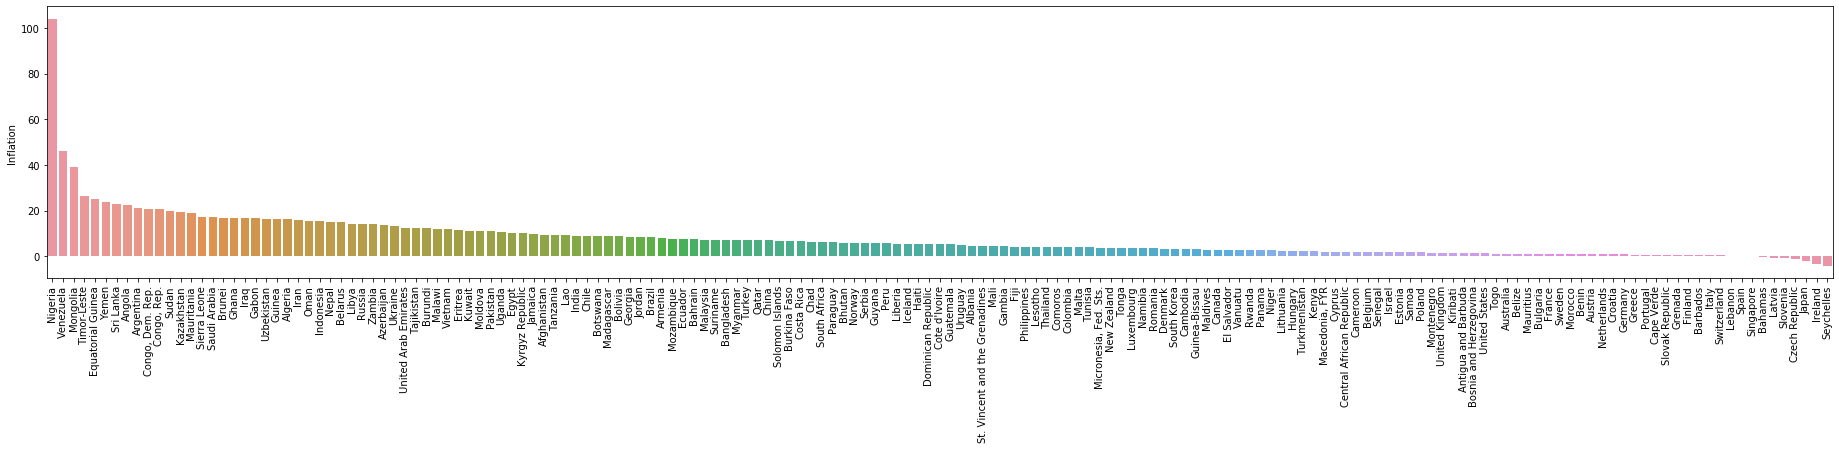

In [25]:
# Inflation: The measurement of the annual growth rate of the Total GDP
plt.figure(figsize = (32,5))
inflation = ngo[['country','inflation']].sort_values('inflation', ascending = False)
ax = sns.barplot(x='country', y='inflation', data= inflation)
ax.set(xlabel = '', ylabel= 'Inflation')
plt.xticks(rotation=90)
plt.show()

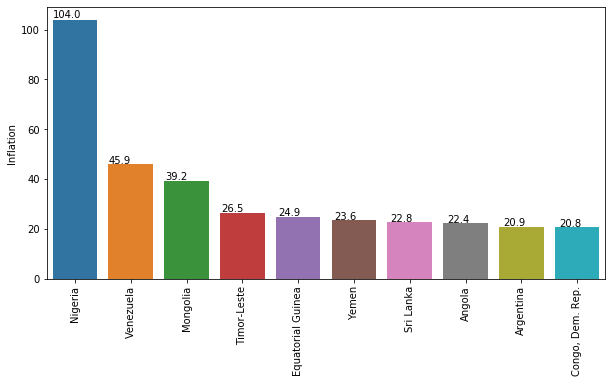

In [26]:
plt.figure(figsize = (10,5))
inflation_top10 = ngo[['country','inflation']].sort_values('inflation', ascending = False).head(10)
ax = sns.barplot(x='country', y='inflation', data= inflation_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Inflation')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having highest Inflation are from countries where there is social / political unrest in progress

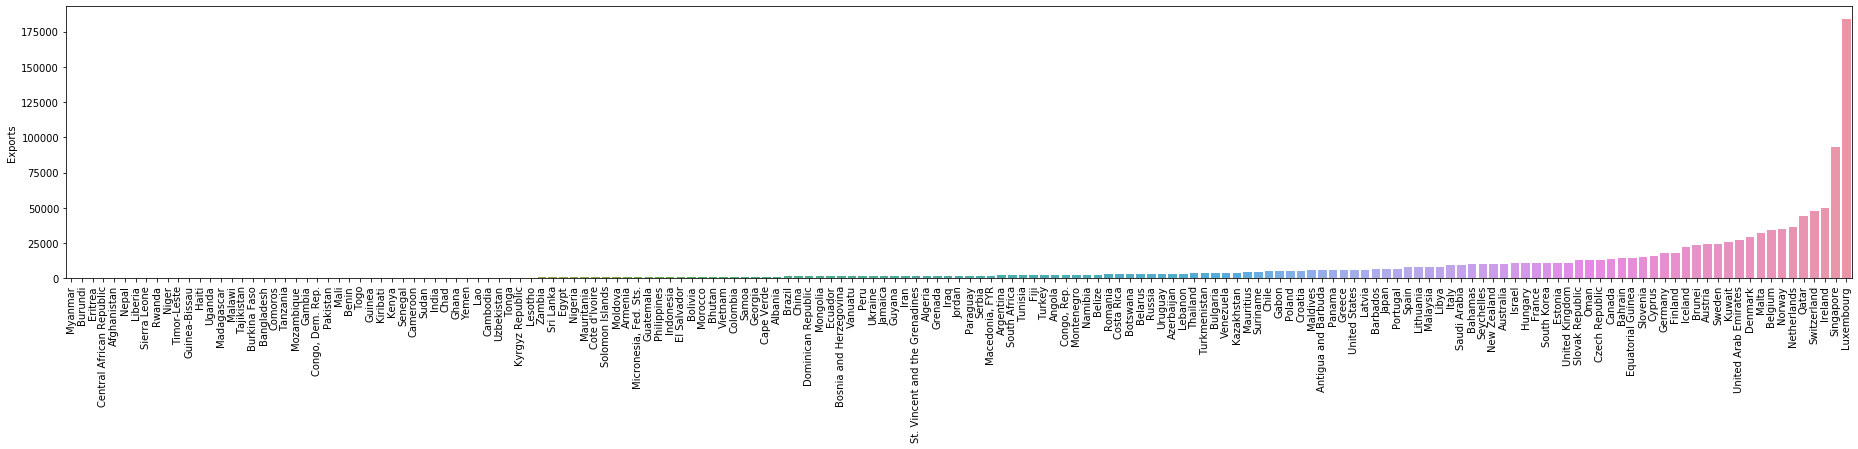

In [27]:
# Exports: Exports of goods and services. Given as %age of the Total GDP
plt.figure(figsize = (32,5))
exports = ngo[['country','exports']].sort_values('exports', ascending = True)
ax = sns.barplot(x='country', y='exports', data= exports)
ax.set(xlabel = '', ylabel= 'Exports')
plt.xticks(rotation=90)
plt.show()

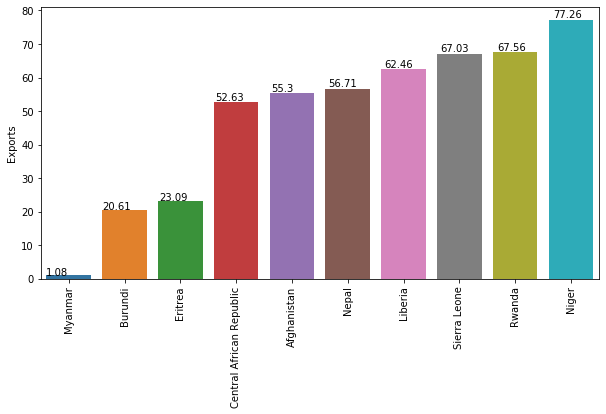

In [28]:
plt.figure(figsize = (10,5))
exports_bottom10 = ngo[['country','exports']].sort_values('exports', ascending = True).head(10)
ax = sns.barplot(x='country', y='exports', data= exports_bottom10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exports')
plt.xticks(rotation=90)
plt.show()

Top 10 Countries having lowest Exports are from mostly from underdeveloped / developing countries

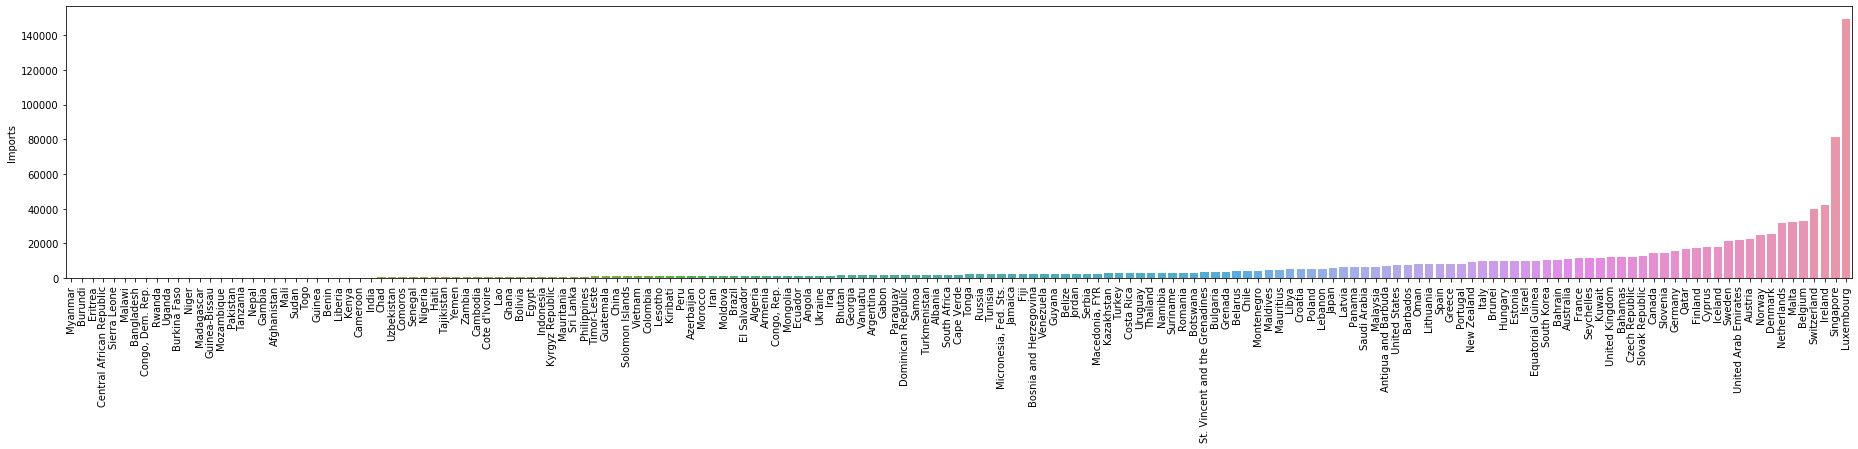

In [29]:
# Imports: Imports of goods and services. Given as %age of the Total GDP
plt.figure(figsize = (32,5))
imports = ngo[['country','imports']].sort_values('imports', ascending = True)
ax = sns.barplot(x='country', y='imports', data= imports)
ax.set(xlabel = '', ylabel= 'Imports')
plt.xticks(rotation=90)
plt.show()

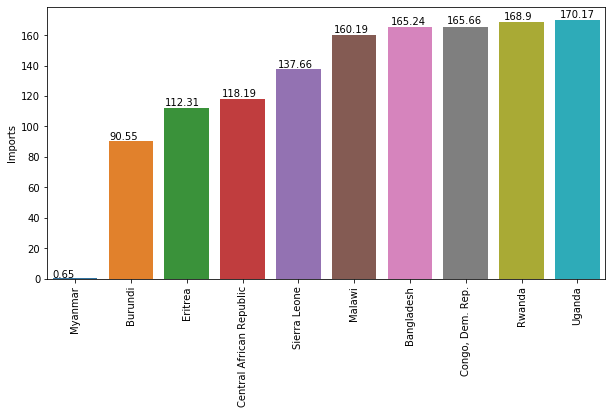

In [30]:
plt.figure(figsize = (10,5))
imports_bottom10 = ngo[['country','imports']].sort_values('imports', ascending = True).head(10)
ax = sns.barplot(x='country', y='imports', data= imports_bottom10)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Imports')
plt.xticks(rotation=90)
plt.show()

We will have a look on the lowest 5 countries for each factor.

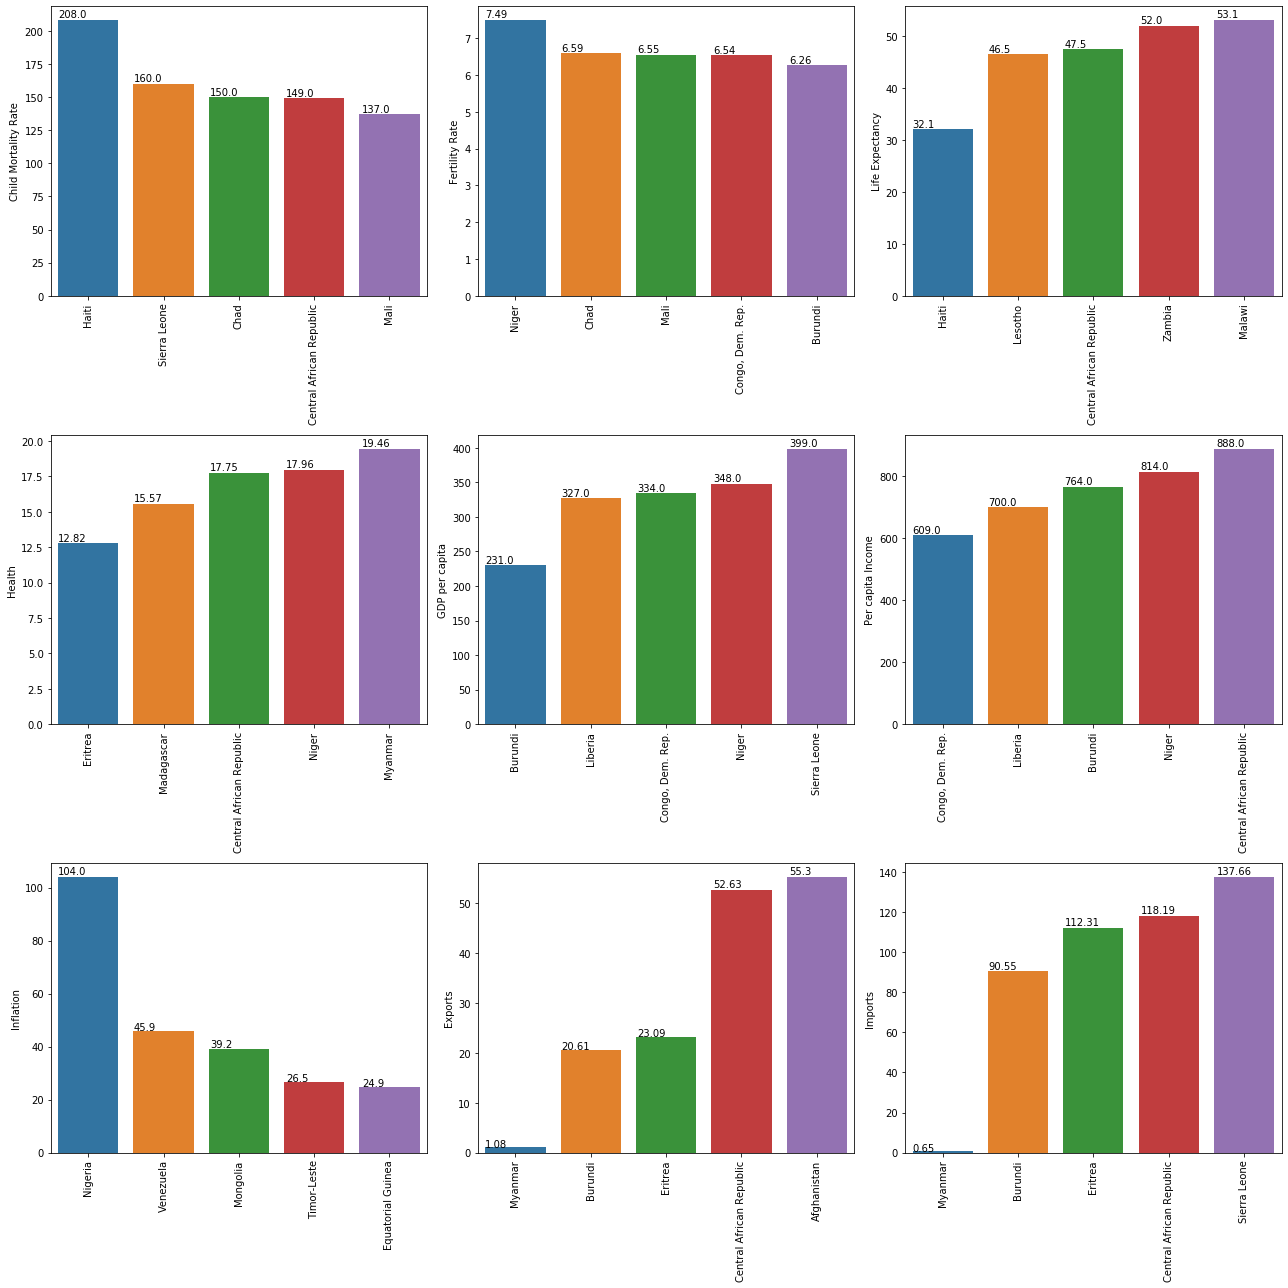

In [31]:
fig, axs = plt.subplots(3,3,figsize = (18,18))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top5_child_mort = ngo[['country','child_mort']].sort_values('child_mort', ascending = False).head()
ax = sns.barplot(x='country', y='child_mort', data= top5_child_mort, ax = axs[0,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top5_total_fer = ngo[['country','total_fer']].sort_values('total_fer', ascending = False).head()
ax = sns.barplot(x='country', y='total_fer', data= top5_total_fer, ax = axs[0,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom5_life_expec = ngo[['country','life_expec']].sort_values('life_expec', ascending = True).head()
ax = sns.barplot(x='country', y='life_expec', data= bottom5_life_expec, ax = axs[0,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as %age of Total GDP.

bottom5_health = ngo[['country','health']].sort_values('health', ascending = True).head()
ax = sns.barplot(x='country', y='health', data= bottom5_health, ax = axs[1,0])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom5_gdpp = ngo[['country','gdpp']].sort_values('gdpp', ascending = True).head()
ax = sns.barplot(x='country', y='gdpp', data= bottom5_gdpp, ax = axs[1,1])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom5_income = ngo[['country','income']].sort_values('income', ascending = True).head()
ax = sns.barplot(x='country', y='income', data= bottom5_income, ax = axs[1,2])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top5_inflation = ngo[['country','inflation']].sort_values('inflation', ascending = False).head()
ax = sns.barplot(x='country', y='inflation', data= top5_inflation, ax = axs[2,0])
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as %age of the Total GDP

bottom5_exports = ngo[['country','exports']].sort_values('exports', ascending = True).head()
ax = sns.barplot(x='country', y='exports', data= bottom5_exports, ax = axs[2,1])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as %age of the Total GDP

bottom5_imports = ngo[['country','imports']].sort_values('imports', ascending = True).head()
ax = sns.barplot(x='country', y='imports', data= bottom5_imports, ax = axs[2,2])
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)    
plt.tight_layout()
plt.savefig('EDA')
plt.show()

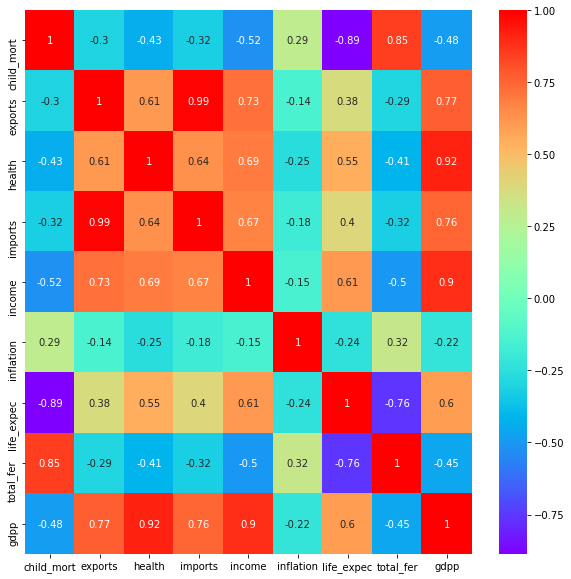

In [32]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10, 10))
sns.heatmap(ngo.corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

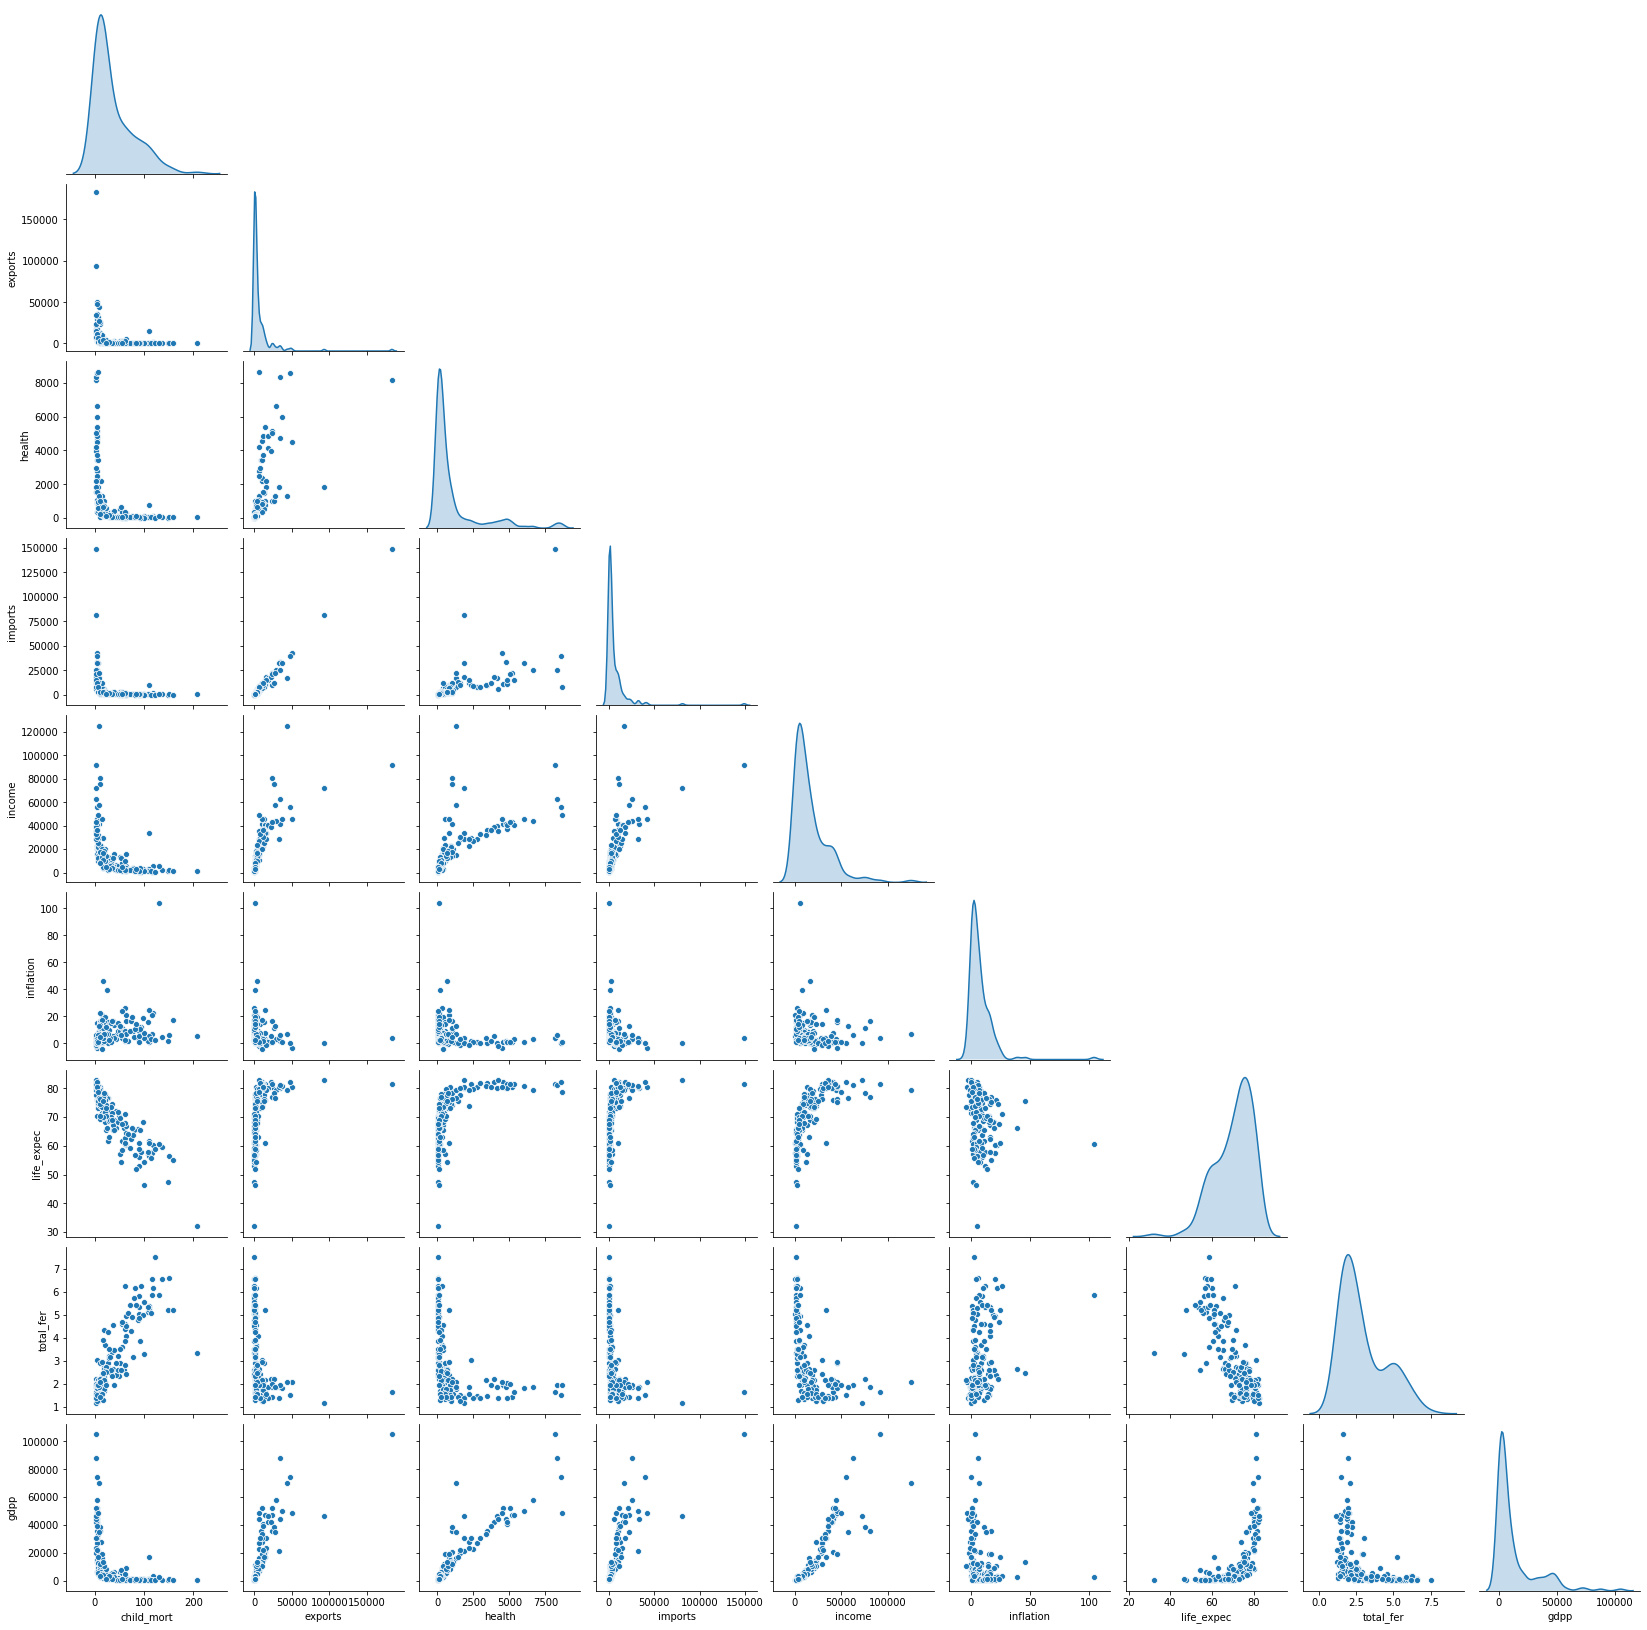

In [33]:
sns.pairplot(ngo,corner=True,diag_kind="kde")
plt.show()

# Outlier Analysis

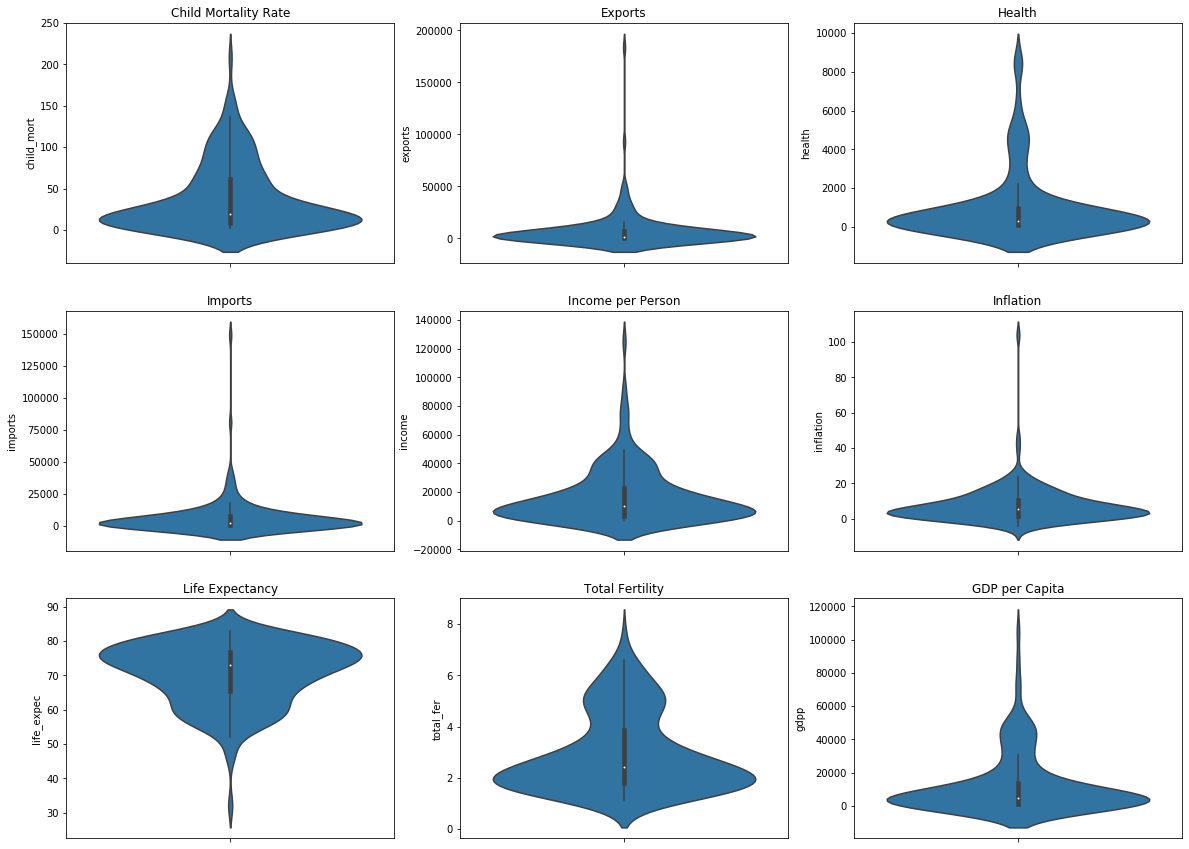

In [34]:

f, axes = plt.subplots(3, 3, figsize=(20, 15))
s=sns.violinplot(y=ngo.child_mort,ax=axes[0, 0])
axes[0, 0].set_title('Child Mortality Rate')
s=sns.violinplot(y=ngo.exports,ax=axes[0, 1])
axes[0, 1].set_title('Exports')
s=sns.violinplot(y=ngo.health,ax=axes[0, 2])
axes[0, 2].set_title('Health')

s=sns.violinplot(y=ngo.imports,ax=axes[1, 0])
axes[1, 0].set_title('Imports')
s=sns.violinplot(y=ngo.income,ax=axes[1, 1])
axes[1, 1].set_title('Income per Person')
s=sns.violinplot(y=ngo.inflation,ax=axes[1, 2])
axes[1, 2].set_title('Inflation')

s=sns.violinplot(y=ngo.life_expec,ax=axes[2, 0])
axes[2, 0].set_title('Life Expectancy')
s=sns.violinplot(y=ngo.total_fer,ax=axes[2, 1])
axes[2, 1].set_title('Total Fertility')
s=sns.violinplot(y=ngo.gdpp,ax=axes[2, 2])
axes[2, 2].set_title('GDP per Capita')
s.get_figure().savefig('boxplot subplots.png')
plt.show()

Plot histogram for each continous variables

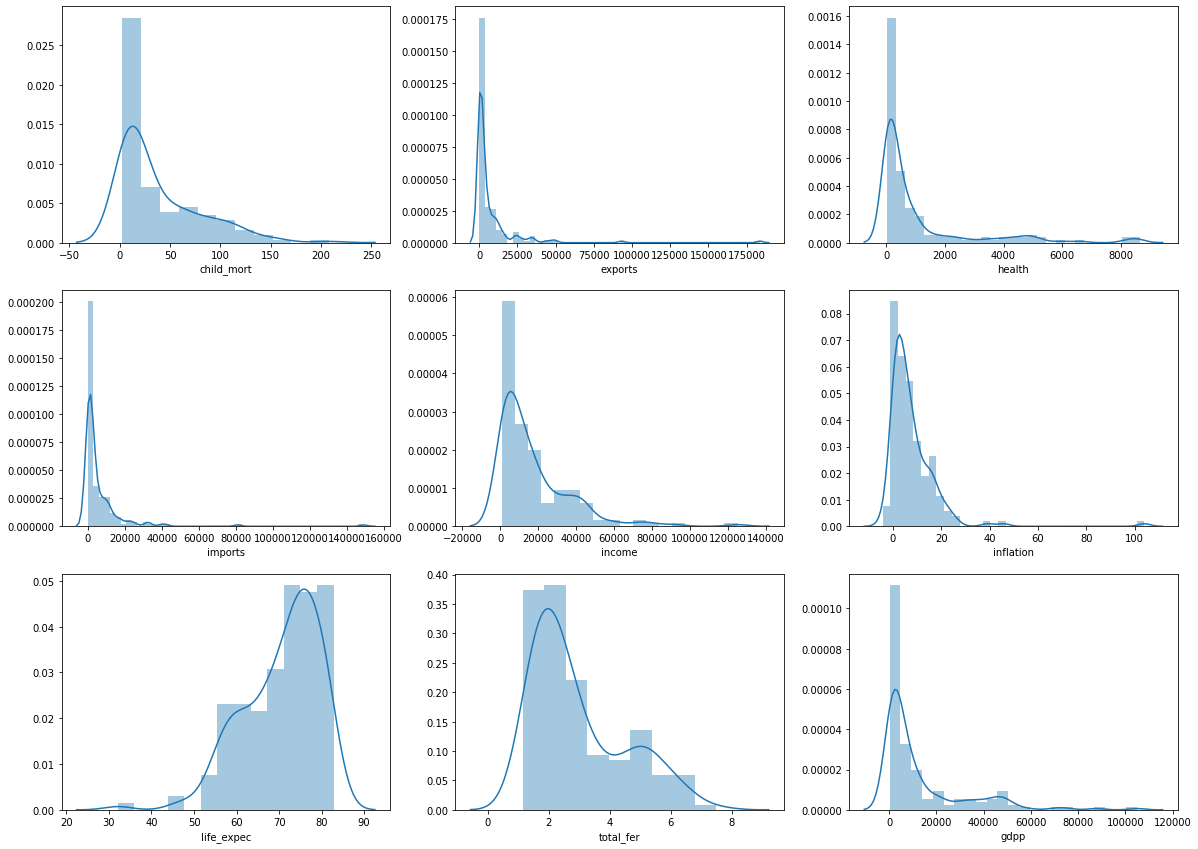

In [35]:
plt.figure(figsize = (20,20))
features=['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features):
    plt.subplot(4,3,i[0]+1)
    sns.distplot(ngo[i[1]])

In [36]:
Q3 = ngo.exports.quantile(0.99)
Q1 = ngo.exports.quantile(0.01)
ngo['exports'][ngo['exports']<=Q1]=Q1
ngo['exports'][ngo['exports']>=Q3]=Q3
Q3 = ngo.imports.quantile(0.99)
Q1 = ngo.imports.quantile(0.01)
ngo['imports'][ngo['imports']<=Q1]=Q1
ngo['imports'][ngo['imports']>=Q3]=Q3
Q3 = ngo.health.quantile(0.99)
Q1 = ngo.health.quantile(0.01)
ngo['health'][ngo['health']<=Q1]=Q1
ngo['health'][ngo['health']>=Q3]=Q3
Q3 = ngo.income.quantile(0.99)
Q1 = ngo.income.quantile(0.01)
ngo['income'][ngo['income']<=Q1]=Q1
ngo['income'][ngo['income']>=Q3]=Q3
Q3 = ngo.inflation.quantile(0.99)
Q1 = ngo.inflation.quantile(0.01)
ngo['inflation'][ngo['inflation']<=Q1]=Q1
ngo['inflation'][ngo['inflation']>=Q3]=Q3
Q3 = ngo.life_expec.quantile(0.99)
Q1 = ngo.life_expec.quantile(0.01)
ngo['life_expec'][ngo['life_expec']<=Q1]=Q1
ngo['life_expec'][ngo['life_expec']>=Q3]=Q3
Q3 = ngo.child_mort.quantile(0.99)
Q1 = ngo.child_mort.quantile(0.01)
ngo['child_mort'][ngo['child_mort']<=Q1]=Q1
ngo['child_mort'][ngo['child_mort']>=Q3]=Q3
Q3 = ngo.total_fer.quantile(0.99)
Q1 = ngo.total_fer.quantile(0.01)
ngo['total_fer'][ngo['total_fer']<=Q1]=Q1
ngo['total_fer'][ngo['total_fer']>=Q3]=Q3
Q3 = ngo.gdpp.quantile(0.99)
Q1 = ngo.total_fer.quantile(0.01)
ngo['gdpp'][ngo['gdpp']<=Q1]=Q1
ngo['gdpp'][ngo['gdpp']>=Q3]=Q3

In [37]:
# Data sfter Outlier Treatment 
ngo.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,37.904790,6538.351334,1054.240319,5873.845499,16858.601677,7.397332,70.645269,2.942896,12756.826347
std,39.026793,11415.230052,1790.825675,9422.259867,17956.060832,7.770993,8.553975,1.497595,17430.208938
min,2.800000,22.243716,17.009362,104.909640,742.240000,-2.348800,47.160000,1.243200,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,153.400000,64794.260000,8410.330400,55371.390000,84374.000000,41.478000,82.370000,6.563600,79088.000000


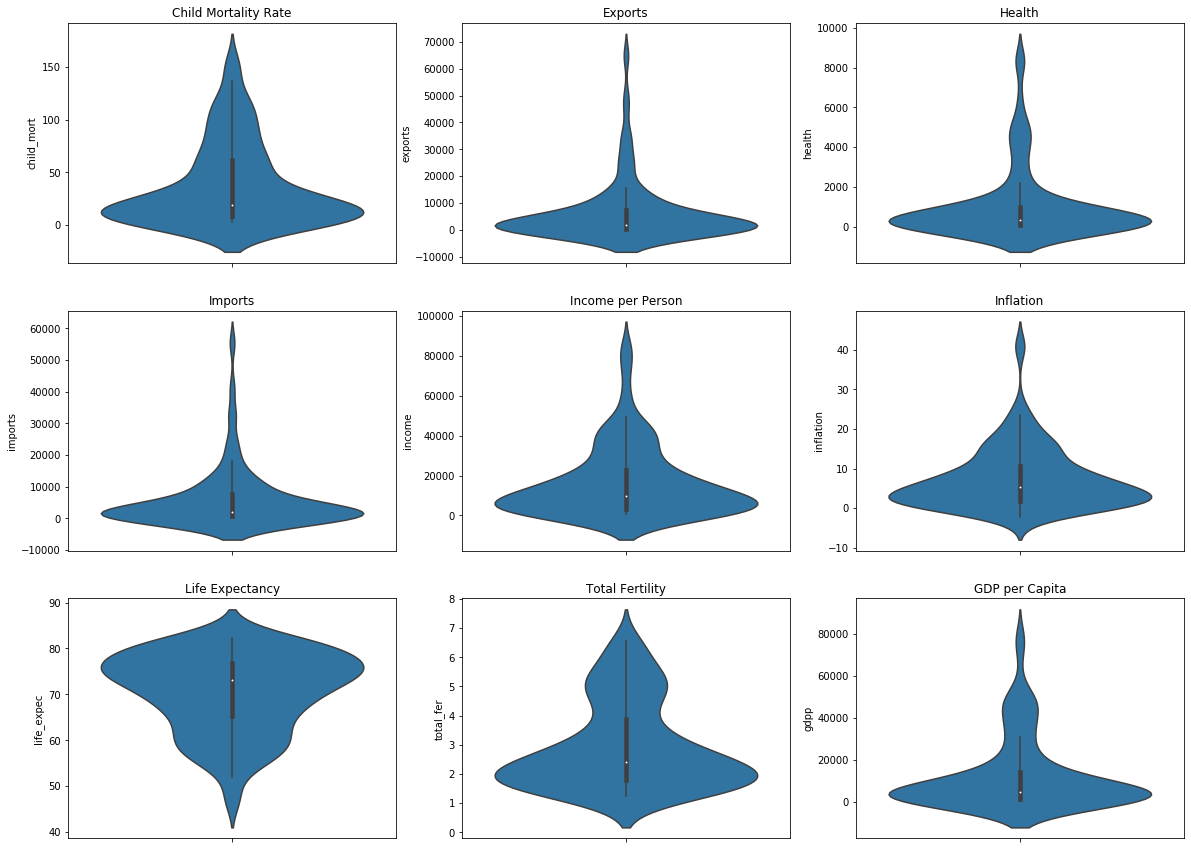

In [38]:

f, axes = plt.subplots(3, 3, figsize=(20, 15))
s=sns.violinplot(y=ngo.child_mort,ax=axes[0, 0])
axes[0, 0].set_title('Child Mortality Rate')
s=sns.violinplot(y=ngo.exports,ax=axes[0, 1])
axes[0, 1].set_title('Exports')
s=sns.violinplot(y=ngo.health,ax=axes[0, 2])
axes[0, 2].set_title('Health')

s=sns.violinplot(y=ngo.imports,ax=axes[1, 0])
axes[1, 0].set_title('Imports')
s=sns.violinplot(y=ngo.income,ax=axes[1, 1])
axes[1, 1].set_title('Income per Person')
s=sns.violinplot(y=ngo.inflation,ax=axes[1, 2])
axes[1, 2].set_title('Inflation')

s=sns.violinplot(y=ngo.life_expec,ax=axes[2, 0])
axes[2, 0].set_title('Life Expectancy')
s=sns.violinplot(y=ngo.total_fer,ax=axes[2, 1])
axes[2, 1].set_title('Total Fertility')
s=sns.violinplot(y=ngo.gdpp,ax=axes[2, 2])
axes[2, 2].set_title('GDP per Capita')
s.get_figure().savefig('boxplot subplots.png')
plt.show()

In [39]:
# Dropping Country field as final dataframe will only contain data columns

ngo_drop = ngo.copy()
country = ngo_drop.pop('country')

In [40]:
ngo_drop.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


# Hopkins Statistics Test

In [44]:
# Calculating Hopkins score to know whether the data is good for clustering or not.

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

In [46]:
# import all libraries and dependencies for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [47]:
# Hopkins score
Hopkins_score=round(hopkins(ngo_drop),2)

In [48]:
Hopkins_score

0.91

0.91 is an excellent Hopkins score

# Rescaling the Features(Standardization)

In [49]:
# Standarisation technique for scaling
scaler = StandardScaler()
ngo_scaled = scaler.fit_transform(ngo_drop)

In [50]:
ngo_df1 = pd.DataFrame(ngo_scaled, columns = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'])
ngo_df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702259
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498726
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477434
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.530950
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032042


# Model Building

### K- means Clustering

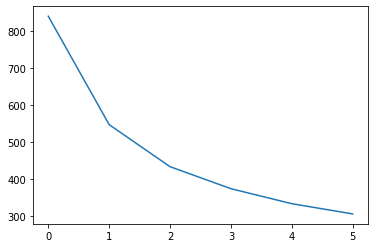

In [52]:
# Elbow curve method to find the ideal number of clusters.
ssd = []
for num_clusters in list(range(2,8)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=150,random_state= 50)
    model_clus.fit(ngo_df1)
    ssd.append(model_clus.inertia_)

plt.plot(ssd);

Looking at the above elbow curve it looks good to proceed with 3 clusters.

# Silhouette Analysis

In [53]:
# Silhouette score analysis to find the ideal number of clusters for K-means clustering

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50,random_state= 100)
    kmeans.fit(ngo_df1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(ngo_df1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4693985523558032
For n_clusters=3, the silhouette score is 0.4070898884641155
For n_clusters=4, the silhouette score is 0.3944993340525435
For n_clusters=5, the silhouette score is 0.3864291132976758
For n_clusters=6, the silhouette score is 0.2993922830096998
For n_clusters=7, the silhouette score is 0.28829902269947366
For n_clusters=8, the silhouette score is 0.32145769851384637


In [54]:
#K-means with k=3 clusters

cluster = KMeans(n_clusters=3, max_iter=150, random_state= 50)
cluster.fit(ngo_df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=150,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [55]:
# Cluster labels

cluster.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [56]:
# Assign the label

ngo['Cluster_Id'] = cluster.labels_
ngo.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [57]:
## Number of countries in each cluster
ngo.Cluster_Id.value_counts(ascending=True)

1    29
2    48
0    90
Name: Cluster_Id, dtype: int64

From the business understanding we have learnt that Child_Mortality, Income, Gdpp are some important factors which decides the development of any country. Hence, we will proceed with analyzing these 3 components to build some meaningful clusters.

In [58]:
ngo[['gdpp','income','child_mort','Cluster_Id']].groupby('Cluster_Id').mean()

,gdpp,income,child_mort
Cluster_Id,,,
0,7808.577778,13804.333333,20.547778
1,46068.137931,47784.413793,4.989655
2,1909.208333,3901.010000,90.335417


# Cluster Profiling

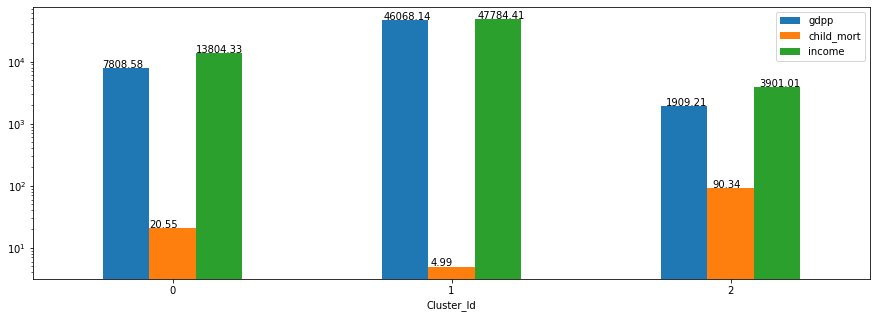

In [59]:
ax=ngo[['gdpp','child_mort','income','Cluster_Id']].groupby('Cluster_Id').mean().plot(kind = 'bar',figsize = (15,5))

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.yscale('log')
plt.xticks(rotation=0)
plt.show();

In [60]:
ngo[ngo['Cluster_Id']==1].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
# They are Developed countries as per UN & IMF

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
82,Kuwait,10.8,25679.5,1012.5500,11704.0,75200.0,11.20,78.2,2.21,38500.0,1
23,Brunei,10.5,23792.2,1002.5200,9884.0,80600.0,16.70,77.1,1.84,35300.0,1
123,Qatar,9.0,43796.9,1272.4300,16731.4,84374.0,6.98,79.5,2.07,70300.0,1
157,United Arab Emirates,8.6,27195.0,1281.0000,22260.0,57600.0,12.50,76.5,1.87,35000.0,1
159,United States,7.3,6001.6,8410.3304,7647.2,49400.0,1.22,78.7,1.93,48400.0,1


In [61]:
ngo[ngo['Cluster_Id']==2].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()

# They are Least developed countries as per UN & IMF

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
132,Sierra Leone,153.4,67.032,52.2690,137.655,1220.0,17.20,55.00,5.2000,399.0,2
66,Haiti,153.4,101.286,45.7442,428.314,1500.0,5.45,47.16,3.3300,662.0,2
32,Chad,150.0,330.096,40.6341,390.195,1930.0,6.39,56.50,6.5636,897.0,2
31,Central African Republic,149.0,52.628,17.7508,118.190,888.0,2.01,47.50,5.2100,446.0,2
97,Mali,137.0,161.424,35.2584,248.508,1870.0,4.37,59.50,6.5500,708.0,2


In [62]:
ngo[ngo['Cluster_Id']==0].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
# They are Developing countries as per UN & IMF

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_Id
107,Myanmar,64.4,22.243716,19.4636,104.90964,3720.0,7.04,66.8,2.41,988.0,0
154,Turkmenistan,62.0,3387.720000,111.0000,1975.80000,9940.0,2.31,67.9,2.83,4440.0,0
69,India,58.8,305.100000,54.6750,365.85000,4410.0,8.98,66.2,2.60,1350.0,0
146,Tajikistan,52.4,109.962000,44.1324,432.46800,2110.0,12.50,69.6,3.51,738.0,0
12,Bangladesh,49.4,121.280000,26.6816,165.24400,2440.0,7.14,70.4,2.33,758.0,0


# Final List of countries which are in need of the aid based on socio-economic factors.

In [65]:
FinalListbyKMean=ngo[ngo['Cluster_Id']==2].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
FinalListbyKMean['country']
FinalListbyKMean.reset_index(drop=True).country[:5]

0    Sierra Leone            
1    Haiti                   
2    Chad                    
3    Central African Republic
4    Mali                    
Name: country, dtype: object

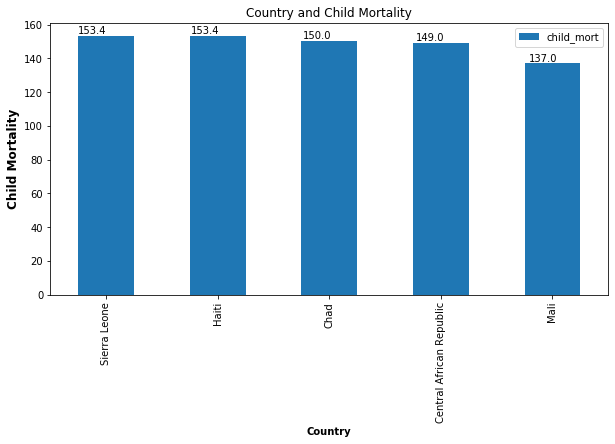

In [71]:
# BarPlot for Child Mortality of countries which are in need of aid
df_list_cm = pd.DataFrame(FinalListbyKMean.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
ax=df_list_cm.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

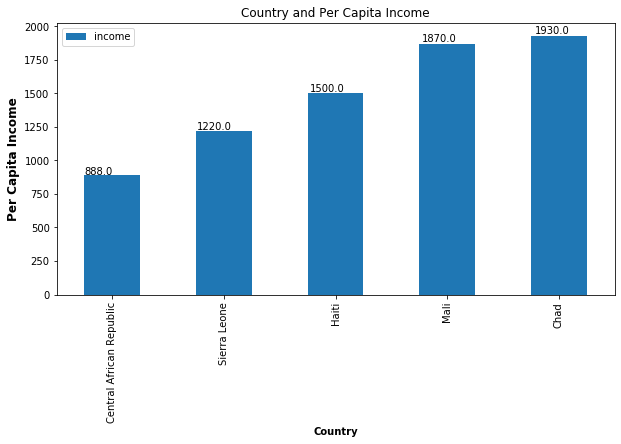

In [66]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_in = pd.DataFrame(FinalListbyKMean.groupby(['country'])['income'].mean().sort_values(ascending = True))
ax=df_list_in.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

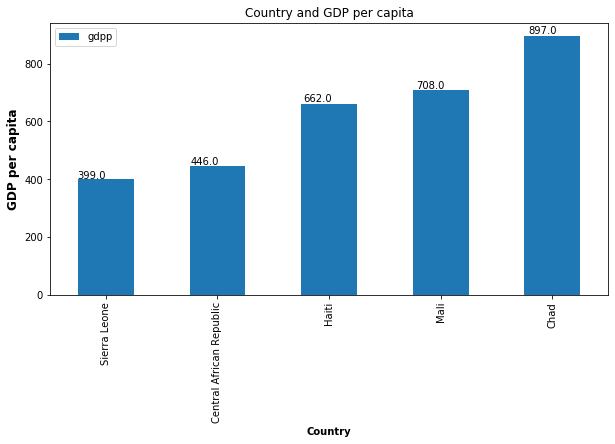

In [67]:
# BarPlot for GDP of countries which are in need of aid

df_list_gdp =pd.DataFrame(FinalListbyKMean.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
ax=df_list_gdp.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

# Hierarchical Clustering

### Single Linkage:

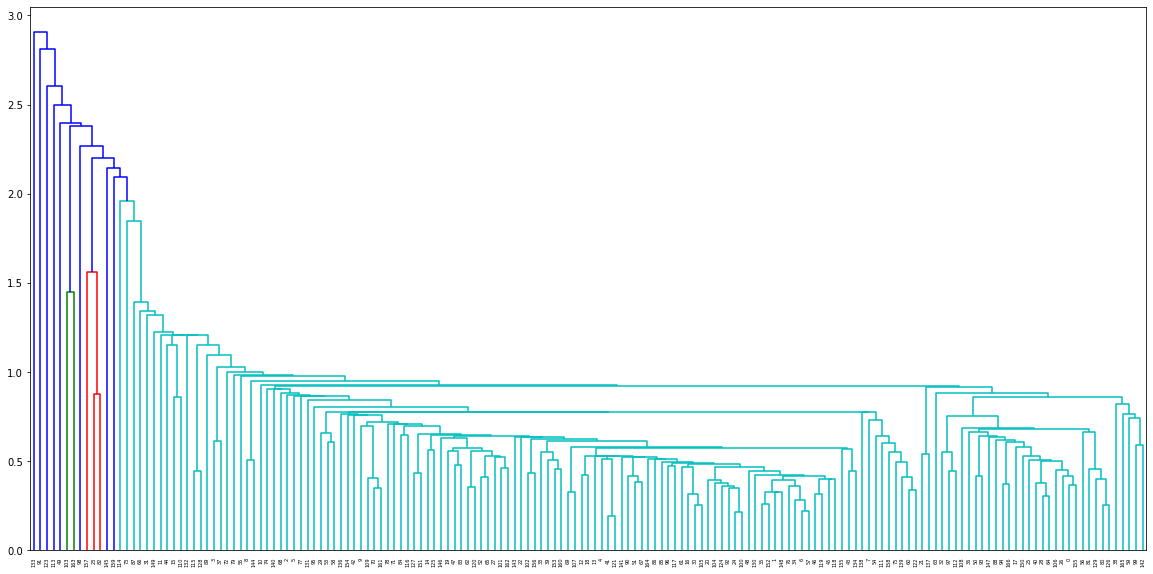

In [72]:
# Single linkage
plt.figure(figsize = (20,10))
mergings = linkage(ngo_df1, method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

### Complete Linkage

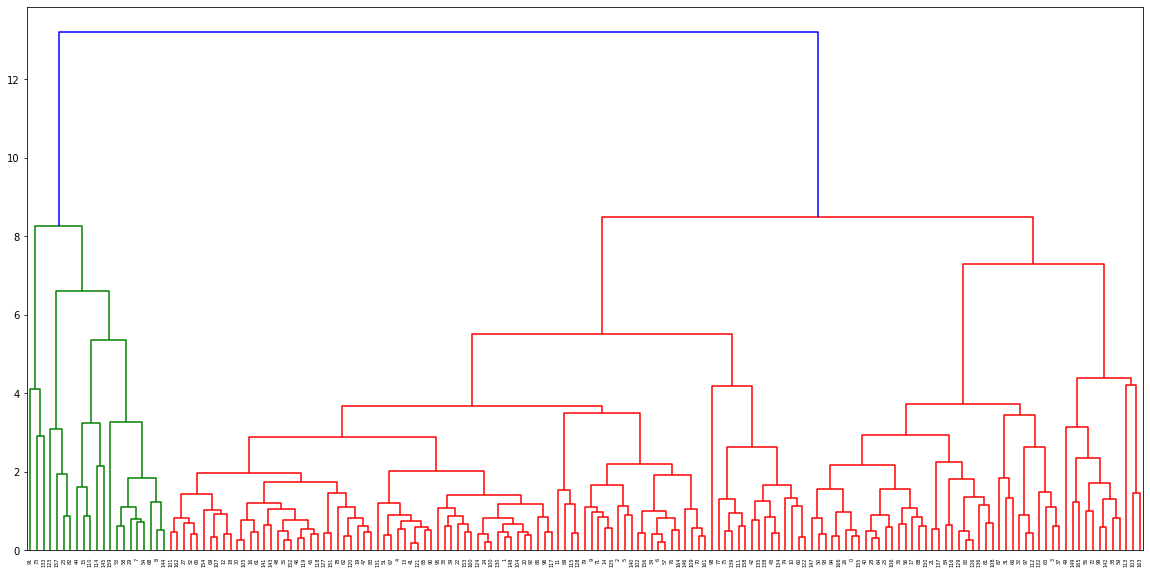

In [73]:
# Complete Linkage
plt.figure(figsize = (20,10))
mergings = linkage(ngo_df1, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [74]:
df_hc = ngo.copy()
df_hc = df_hc.drop('Cluster_Id',axis=1)
df_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [75]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0])

In [76]:
# assign cluster labels
df_hc['Cluster_labels'] = cluster_labels
df_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels
0,Afghanistan,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,1


In [77]:
## Number of countries in each cluster
df_hc.Cluster_labels.value_counts(ascending=True)

2    21
0    50
1    96
Name: Cluster_labels, dtype: int64

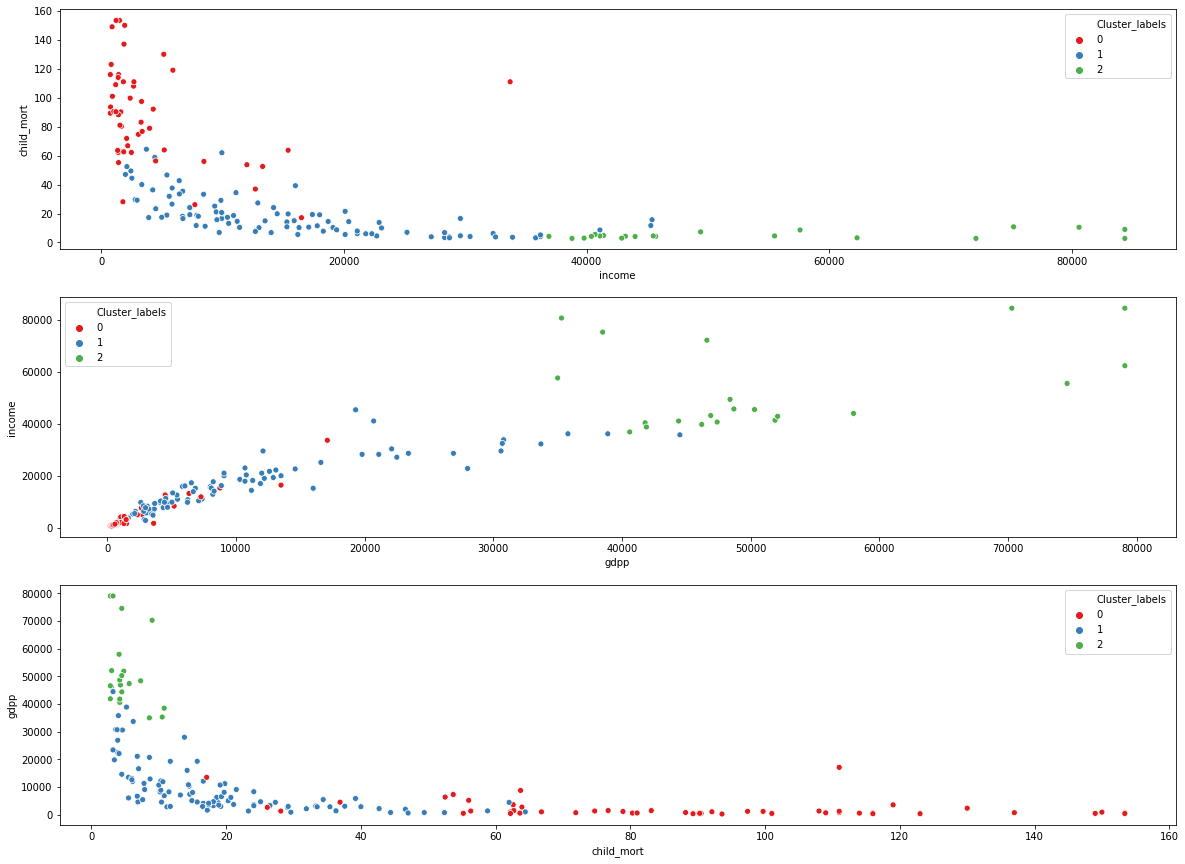

In [78]:
# Scatter plot on Original attributes to visualize the spread of the data

plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'income', y = 'child_mort',hue='Cluster_labels',data = df_hc,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'gdpp', y = 'income',hue='Cluster_labels', data = df_hc,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'child_mort', y = 'gdpp',hue='Cluster_labels', data=df_hc,legend='full',palette="Set1")
plt.show()

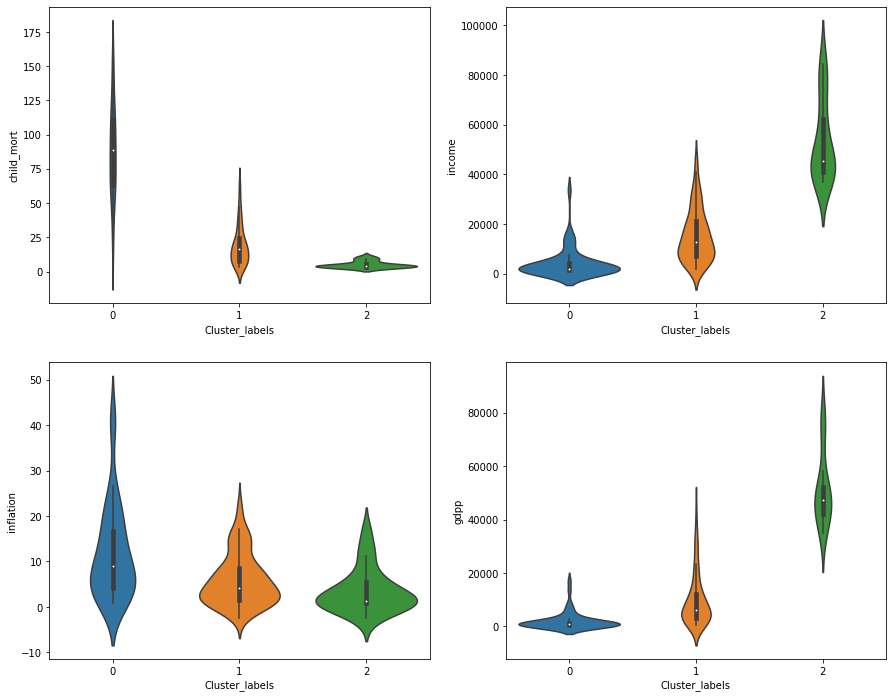

In [79]:
#Violin plot on Original attributes to visualize the spread of the data

fig, axes = plt.subplots(2,2, figsize=(15,12))

sns.violinplot(x = 'Cluster_labels', y = 'child_mort', data = df_hc,ax=axes[0][0])
sns.violinplot(x = 'Cluster_labels', y = 'income', data = df_hc,ax=axes[0][1])
sns.violinplot(x = 'Cluster_labels', y = 'inflation', data=df_hc,ax=axes[1][0])
sns.violinplot(x = 'Cluster_labels', y = 'gdpp', data=df_hc,ax=axes[1][1])
plt.show()

# Cluster Profiling

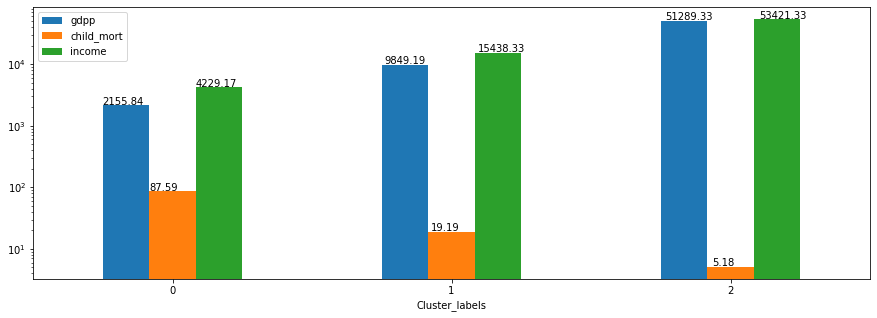

In [80]:
ax=df_hc[['gdpp','child_mort','income','Cluster_labels']].groupby('Cluster_labels').mean().plot(kind = 'bar',figsize = (15,5))

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.yscale('log')
plt.xticks(rotation=0)
plt.show();

In [81]:
df_hc[df_hc['Cluster_labels']==2].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
# They are Developed countries as per UN & IMF

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels
82,Kuwait,10.8,25679.5,1012.5500,11704.0,75200.0,11.20,78.2,2.21,38500.0,2
23,Brunei,10.5,23792.2,1002.5200,9884.0,80600.0,16.70,77.1,1.84,35300.0,2
123,Qatar,9.0,43796.9,1272.4300,16731.4,84374.0,6.98,79.5,2.07,70300.0,2
157,United Arab Emirates,8.6,27195.0,1281.0000,22260.0,57600.0,12.50,76.5,1.87,35000.0,2
159,United States,7.3,6001.6,8410.3304,7647.2,49400.0,1.22,78.7,1.93,48400.0,2


# Final List of countries which are in need of the aid based on socio-economic factors.

In [82]:
FinalListbyHC=df_hc[df_hc['Cluster_labels']==0].sort_values(by = ['child_mort','income','gdpp',], ascending = [False, True, True]).head()
FinalListbyHC['country']
FinalListbyHC.reset_index(drop=True).country[:5]

0    Sierra Leone            
1    Haiti                   
2    Chad                    
3    Central African Republic
4    Mali                    
Name: country, dtype: object

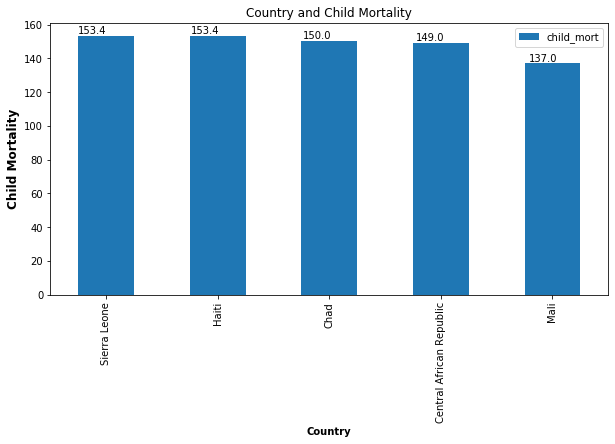

In [83]:
# BarPlot for Child Mortality of countries which are in need of aid
df_list_cm = pd.DataFrame(FinalListbyHC.groupby(['country'])['child_mort'].mean().sort_values(ascending = False))
ax=df_list_cm.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Child Mortality')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Child Mortality", fontsize = 12, fontweight = 'bold')
plt.show()

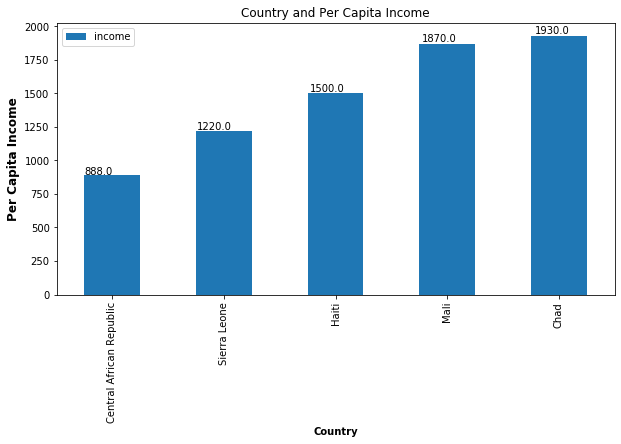

In [84]:
# BarPlot for Per Capita Income of countries which are in need of aid

df_list_in = pd.DataFrame(FinalListbyHC.groupby(['country'])['income'].mean().sort_values(ascending = True))
ax=df_list_in.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.title('Country and Per Capita Income')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("Per Capita Income", fontsize = 12, fontweight = 'bold')
plt.show()

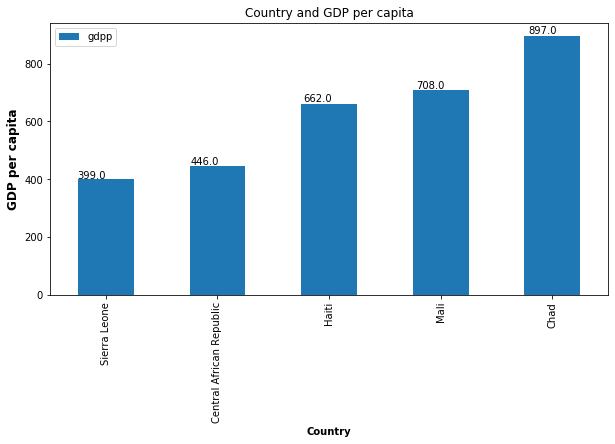

In [85]:
# BarPlot for GDP of countries which are in need of aid

df_list_gdp =pd.DataFrame(FinalListbyHC.groupby(['country'])['gdpp'].mean().sort_values(ascending = True))
ax=df_list_gdp.plot(kind = 'bar',figsize = (10,5))
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.title('Country and GDP per capita')
plt.xlabel("Country",fontweight = 'bold')
plt.ylabel("GDP per capita", fontsize = 12, fontweight = 'bold')
plt.show()

# Final Analysis

In [86]:
## Number of countries in each cluster in K-Means 
ngo.Cluster_Id.value_counts(ascending=True)

1    29
2    48
0    90
Name: Cluster_Id, dtype: int64

In [87]:
## Number of countries in each cluster for Hierarchical clustering
df_hc.Cluster_labels.value_counts(ascending=True)

2    21
0    50
1    96
Name: Cluster_labels, dtype: int64

In [88]:
#FinalList with K-Means
FinalListbyKMean.reset_index(drop=True).country

0    Sierra Leone            
1    Haiti                   
2    Chad                    
3    Central African Republic
4    Mali                    
Name: country, dtype: object

In [89]:
# Final countries list with Hierarchical clustering
FinalListbyHC.reset_index(drop=True).country

0    Sierra Leone            
1    Haiti                   
2    Chad                    
3    Central African Republic
4    Mali                    
Name: country, dtype: object

In [90]:
# Final countries list
FinalListbyKMean.reset_index(drop=True).country

0    Sierra Leone            
1    Haiti                   
2    Chad                    
3    Central African Republic
4    Mali                    
Name: country, dtype: object